<a href="https://colab.research.google.com/github/Andersonof30/Diabetes-hard-soft-classifier/blob/main/Diabetes_hard_soft_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
import requests
 
url = "https://raw.githubusercontent.com/Andersonof30/Diabetes-hard-soft-classifier/main/diabetes%20FI.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [ ]:
data = data[['Glucose', 'BMI', 'Age', 'Pregnancies', 'Outcome']]
data = data.drop(data[data['BMI'] == 0].index)
data.head()

,Glucose,BMI,Age,Pregnancies,Outcome
0,148,33.6,50,6,1
1,85,26.6,31,1,0
2,183,23.3,32,8,1
3,89,28.1,21,1,0
4,137,43.1,33,0,1


In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler


In [ ]:
data

,Glucose,BMI,Age,Pregnancies,Outcome
0,148,33.6,50,6,1
1,85,26.6,31,1,0
2,183,23.3,32,8,1
3,89,28.1,21,1,0
4,137,43.1,33,0,1
...,...,...,...,...,...
763,101,32.9,63,10,0
764,122,36.8,27,2,0
765,121,26.2,30,5,0
766,126,30.1,47,1,1


In [ ]:
sc = StandardScaler()
VR = pd.DataFrame(data[['Outcome']])


In [ ]:
data2 = data.drop(['Outcome'], axis = 1)
aux0 = sc.fit_transform(data2)
VN = pd.DataFrame(aux0)

VN.reset_index(drop=True, inplace=True)
VR.reset_index(drop=True, inplace=True)
data = pd.concat([VN, VR], axis = 1, ignore_index=True, sort=False)

data.head()

,0,1,2,3,4
0,0.838444,0.165097,1.430162,0.640157,1
1,-1.127834,-0.846404,-0.195156,-0.844521,0
2,1.930820,-1.323254,-0.109613,1.234029,1
3,-1.002991,-0.629654,-1.050586,-0.844521,0
4,0.495125,1.537847,-0.024070,-1.141457,1


In [ ]:
kf = KFold(n_splits = 50, shuffle = True) #numero de divisão


In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
Xk, Xvalid, Yk, Yvalid = train_test_split(data.drop([4], axis = 1), 
                                                    data[4], 
                                                    test_size = 0.2, random_state = 12)
#12

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC  


In [ ]:
valores = np.arange(5, 30, 2) #profundidades
parametros2 = {'max_depth': valores}
clf_mk = GridSearchCV(RandomForestClassifier(), param_grid = parametros2, cv = kf, scoring = 'accuracy')
clf_mk.fit(Xk, Yk)

GridSearchCV(cv=KFold(n_splits=50, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])},
             scoring='accuracy')

In [ ]:
vlk = np.arange(5, 40, 2)
park = {'n_neighbors': vlk}
knn = GridSearchCV(KNeighborsClassifier(), param_grid= park , cv = kf, scoring = 'accuracy')
knn.fit(Xk, Yk)


GridSearchCV(cv=KFold(n_splits=50, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37,
       39])},
             scoring='accuracy')

In [ ]:
valores = np.arange(5, 40, 2) #profundidades
parametros = {'max_depth': valores}
arvore = GridSearchCV(DecisionTreeClassifier(), param_grid = parametros, cv = kf, scoring = 'accuracy')
arvore.fit(Xk, Yk)

In [ ]:
rf_av = clf_mk.cv_results_['mean_test_score']
print(clf_mk.best_params_)
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))
plt.style.use('ggplot')
plt.plot(valores, rf_av, color = 'red')
plt.ylabel("Acurácia")
plt.xlabel("Profundidade máxima")
plt.show()


In [ ]:
acc_av = arvore.cv_results_['mean_test_score']
print(arvore.best_params_)
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))
plt.style.use('ggplot')
plt.plot(valores, acc_av, color = 'red')
plt.ylabel("Acurácia")
plt.xlabel("Profundidade máxima")
plt.show()


NameError: ignored

{'n_neighbors': 19}


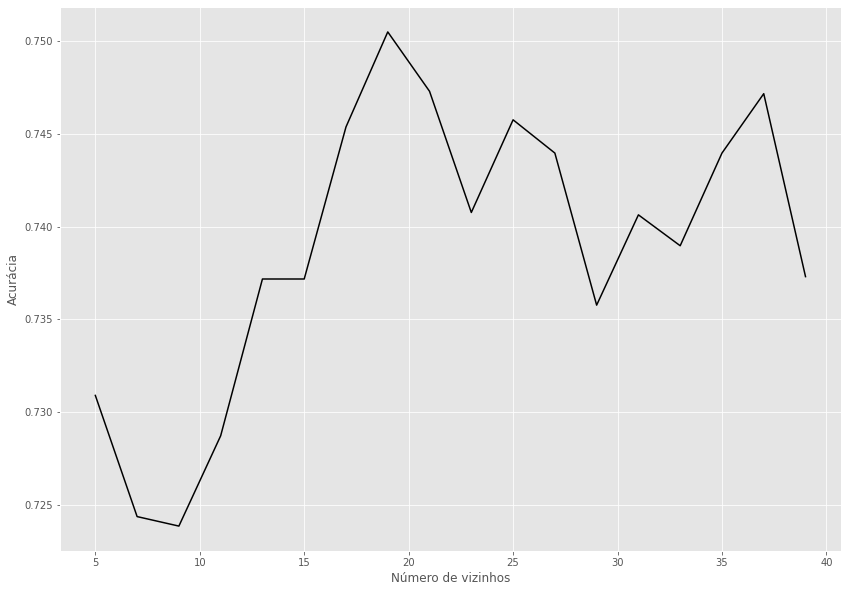

In [ ]:
ac_kn = knn.cv_results_['mean_test_score']
print(knn.best_params_)
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))
plt.style.use('ggplot')
plt.plot(vlk, ac_kn, color = 'black')
plt.ylabel("Acurácia")
plt.xlabel("Número de vizinhos")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
def MetricasClassBinaria(observado, predito, custo = None):
    mc = confusion_matrix(observado, predito)
    vn, fp, fn, vp = mc.flatten()

    pre = observado.mean()
    acc = (vn + vp)/(vn + fp + fn + vp) 
    sen = vp/(vp + fn)
    esp = vn/(vn + fp)
    vpp = vp/(vp + fp)
    vpn = vn/(vn + fn) 
    mcc = (vp*vn - fp*fn)/np.sqrt((vp + fp)*(vp + fn)*(vn + fp)*(vn + fn))
    f1s = 2*vpp*sen/(vpp + sen) 
    efi = (sen + esp)/2

    
    print('                  Acurácia: {:.4f}'.format(acc))
    print('             Sensibilidade: {:.4f}'.format(sen))
    print('            Especificidade: {:.4f}'.format(esp))
    print('  Valor Preditivo Positivo: {:.4f}'.format(vpp))
    print('  Valor Preditivo Negativo: {:.4f}'.format(vpn))
    print('Coef. de Corr. de Matthews: {:.4f}'.format(mcc))
    print('                  F1-Score: {:.4f}'.format(f1s))
    #print('                Eficiência: {:.4f}'.format(efi))
    print('Matriz de confusão', mc)

    metricas = 0
    #{'prevalência': pre, 'acurácia': acc, 'sensibilidade': sen, 
            #'especificidade': esp, 'vpp': vpp, 'vpn': vpn, 'mcc': mcc,
           #'f1-score': f1s, 'eficiência': efi}

    #if custo is not None:
    #    cost = (mc * np.array(custo).reshape(2,2)).sum()
    #    print('\n                     Custo: {}'.format(cost))
    #    metricas['custo'] = cost
#
    return metricas

In [ ]:
# md = 5
valores5 = np.arange(5, 6, 2) #profundidades
parametros5 = {'max_depth': valores5}
clf_mk5 = GridSearchCV(RandomForestClassifier(), param_grid = parametros5, cv = kf, scoring = 'accuracy')
clf_mk5.fit(Xk, Yk)

#reglog
rlog = GridSearchCV(LogisticRegression(), param_grid={} , cv = kf, scoring = 'accuracy')
rlog.fit(Xk, Yk)

#knn 13
vlk13 = np.arange(29, 30, 2) #profundidades
park = {'n_neighbors': vlk13}
knn_mk13 = GridSearchCV(KNeighborsClassifier(), param_grid = park, cv = kf, scoring = 'accuracy')
knn_mk13.fit(Xk, Yk)


#arvore 2
val_4 = np.arange(2, 5, 1) #profundidades
par_a4 = {'max_depth': val_4}
arv2 = GridSearchCV(DecisionTreeClassifier(), param_grid = par_a4, cv = kf, scoring = 'accuracy')
arv2.fit(Xk, Yk)

#svm
svm1 = GridSearchCV(SVC(probability= True), param_grid={} , cv = kf, scoring = 'accuracy')
svm1.fit(Xk, Yk)
#39
print('rf')
pred_rf5 = clf_mk5.predict(Xvalid)
met_rf5 = MetricasClassBinaria(Yvalid, pred_rf5)

#svm
print('svm')
pred_svm = svm1.predict(Xvalid)
met_svm = MetricasClassBinaria(Yvalid, pred_svm)

#reglog
print('rlog')
pred_rlog = rlog.predict(Xvalid)
met_rlog = MetricasClassBinaria(Yvalid, pred_rlog)

#knn
print('knn')
pred_k13 = knn_mk13.predict(Xvalid)
met_k13 = MetricasClassBinaria(Yvalid, pred_k13)

#arvore
print('arv')
pred_av2 = arv2.predict(Xvalid)
met_arv2 = MetricasClassBinaria(Yvalid, pred_av2)

modelos = [ "Regressão logística", 'SVM', 'Random Forest (5)', "KNN (13)", "Arvore de Decisão (2)"]

preditos = [met_rlog, met_svm, met_rf5,met_k13, met_arv2]

resultados = pd.DataFrame()

for i in range(len(modelos)):
    aux = pd.DataFrame.from_dict(preditos[i], orient = 'index', columns = [modelos[i]])
    resultados = pd.concat([resultados, aux], axis = 1)
resultados.T.round(4).sort_values('acurácia', ascending = False).to_csv('met mod.csv')

rf
                  Acurácia: 0.7961
             Sensibilidade: 0.6383
            Especificidade: 0.8667
  Valor Preditivo Positivo: 0.6818
  Valor Preditivo Negativo: 0.8426
Coef. de Corr. de Matthews: 0.5146
                  F1-Score: 0.6593
                Eficiência: 0.7525
svm
                  Acurácia: 0.7961
             Sensibilidade: 0.5745
            Especificidade: 0.8952
  Valor Preditivo Positivo: 0.7105
  Valor Preditivo Negativo: 0.8246
Coef. de Corr. de Matthews: 0.5013
                  F1-Score: 0.6353
                Eficiência: 0.7349
rlog
                  Acurácia: 0.7961
             Sensibilidade: 0.6170
            Especificidade: 0.8762
  Valor Preditivo Positivo: 0.6905
  Valor Preditivo Negativo: 0.8364
Coef. de Corr. de Matthews: 0.5097
                  F1-Score: 0.6517
                Eficiência: 0.7466
knn
                  Acurácia: 0.8158
             Sensibilidade: 0.6596
            Especificidade: 0.8857
  Valor Preditivo Positivo: 0.7209
  Va

In [ ]:
params = {
   'rf__max_depth': [5],
   'knn__n_neighbors': [29],
   'arv__max_depth': [2]
}

In [ ]:
from sklearn.ensemble import VotingClassifier

eclf_h = VotingClassifier(estimators=[('rf', RandomForestClassifier()), ('rlog', LogisticRegression()),
       ('knn', KNeighborsClassifier()), ('arv', DecisionTreeClassifier()),
       ('svm', SVC())], voting='hard')

In [ ]:
eclf_s = VotingClassifier(estimators=[('rf', RandomForestClassifier()), ('rlog', LogisticRegression()),
       ('knn', KNeighborsClassifier()), ('arv', DecisionTreeClassifier()),
       ('svm', SVC(probability=True))], voting='soft')

In [ ]:
grid_h = GridSearchCV(estimator=eclf_h, param_grid=params, cv= kf)

In [ ]:
grid_s = GridSearchCV(estimator=eclf_s, param_grid=params, cv= kf)

In [ ]:
grid_h.fit(Xk, Yk)

In [ ]:
met_hz = pd.DataFrame.from_dict(MetricasClassBinaria(Yvalid,  grid_h.predict(Xvalid)), orient = 'index')
met_hz.to_csv('met haz.csv')

In [ ]:
grid_s.fit(Xk, Yk)

In [ ]:
met_s = pd.DataFrame.from_dict(MetricasClassBinaria(Yvalid,  grid_s.predict(Xvalid)), orient = 'index')
met_s.to_csv('met soft.csv')

                  Acurácia: 0.8158
             Sensibilidade: 0.6170
            Especificidade: 0.9048
  Valor Preditivo Positivo: 0.7436
  Valor Preditivo Negativo: 0.8407
Coef. de Corr. de Matthews: 0.5522
                  F1-Score: 0.6744
                Eficiência: 0.7609


In [ ]:
np.random.seed(453)
params = {
   'rf__max_depth': [5],
   'knn__n_neighbors': [29]
}
eclf_s2 = VotingClassifier(estimators=[('rf', RandomForestClassifier()), 
                                       ('knn', KNeighborsClassifier()),
                                       ('svm', SVC(probability=True))], voting='soft', weights = [2,1, 1])
grid_s2 = GridSearchCV(estimator=eclf_s2, param_grid=params, cv= kf)

In [ ]:
np.random.seed(453)
grid_s2.fit(Xk, Yk)
MetricasClassBinaria(Yvalid,  grid_s2.predict(Xvalid))

                  Acurácia: 0.8355
             Sensibilidade: 0.6596
            Especificidade: 0.9143
  Valor Preditivo Positivo: 0.7750
  Valor Preditivo Negativo: 0.8571
Coef. de Corr. de Matthews: 0.6023
                  F1-Score: 0.7126
Matriz de confusão [[96  9]
 [16 31]]


0

In [ ]:
#combinação de modelos
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[ ('rf', clf_mk5), ('log_reg', rlog), ('arv', arv2)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard', weights= [1,1,1])

In [ ]:
#fit model to training data
mod_comb = ensemble.fit(Xk, Yk)
#test our model on the test data
ensemble.score(Xvalid, Yvalid)

In [ ]:
MetricasClassBinaria(Yvalid, mod_comb.predict(Xvalid))

In [ ]:
met_comb = MetricasClassBinaria(Yvalid, grid_s2.predict(Xvalid))

In [ ]:
met_combd = pd.DataFrame.from_dict(met_comb, orient='index').rename(columns={0:'Métricas'})
met_combd.to_csv('met comb.csv')

In [ ]:
sc.fit_transform(data2.append(pd.DataFrame([[141, 36, 41, 6]], columns = ['Glucose', 'BMI', 'Age', 'Pregnancies'])))[-1, :]
grid_s2.predict_proba([[0.62, 0.51, 0.66, 0.64]])

In [ ]:
rating = []
for row in prob_comb[0]:
        if row >= 0.55 :    rating.append(0)
        elif row < 0.45:   rating.append(1)
      
        
        else:           rating.append(2)

In [ ]:
Yv = pd.DataFrame(Yvalid)


In [ ]:
tb_a = []
a2 = 0
for i in range(0, 152):
  if int(rating[i]) == 2: a2 += 1 
  tb_a.append(int(rating[i]) == int(Yv.iloc[i]))
print(a2)
tb_a.count(True)/(152 - a2)

11


0.8439716312056738

In [ ]:
tb_a = []
for i in range(0, 154):
  tb_a.append(int(prob_comb.loc[i, 'pred']) == int(Yv.iloc[i]))

tb_a.count(True)/154

0.8246753246753247